# Homework 03

## Preface

I decided to do parts 1 and 2 in reverse order, since I didn't have a problem in mind when I set out to find a dataset. After navigating to open data nyc, I quickly found a squirrel dataset and thought, **who doesn't love squirrels?**

## Part 1 - Questions

### Question 1: 

Does squirrel color affect how shy/aggressive they are towards humans?

* Who (population): Squirrels of Central Park
* What (subject, discipline): Not applicable
* Where (location): Central Park
* When (snapshot, longitudinal): 2018 (snapshot)
* How much data do you need to do the analysis/work: "Primary Fur Color", "Highlight Fur Color", "Combination of Primary and Highlight Color," "Color Notes", "Approaches", "Indifferent", and "Runs From" columns. All rows.

### Question 2: 

Can we predict a squirrel's action based on its location within the park?

* Who (population): Squirrels of Central Park
* What (subject, discipline): Not applicable
* Where (location): Central Park
* When (snapshot, longitudinal): 2018 (snapshot)
* How much data do you need to do the analysis/work: "Running", "Chasing", "Climbing", "Eating", "Foraging", "X", "Y", and "Lat/Long" columns. All rows.

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

Perhaps Nature magazine or some other scientific journal interested in the squirrel population. Or, perhaps a ***really*** invested citizen.

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: 2018 Central Park Squirrel Census
2. Link to Data: https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw
3. Source / Origin: 
	* Author or Creator: The Squirrel Census (organization)
	* Publication Date: October 13, 2019
	* Publisher: NYC Open Data
	* Version or Data Accessed: Accessed February 17, 2022. Last modified October 19, 2019.
4. License: Creative Commons
5. Can You Use this Data Set for Your Intended Use Case? Yes, I tailored the questions to suit the dataset.

## Format




### Overview

* Format: CSV
* Size: 748 KB
* Number of Records: 3023


### Sample of Data




In [1]:
# TODO show a few lines of data from the actual file
# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 

import numpy as np
import csv
from matplotlib import pyplot as plt

root = "/Users/ericssoncolborn/Documents/NYU/Spring_2022/Database_Management/homework03-ericsson-c"
squirrels_raw = []
with open(root + "/data/raw/squirrel.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        squirrels_raw.append(row)
   
headers = squirrels_raw[0]
squirrels = squirrels_raw[1:]
print('Headers: \n', headers, '\n')
print('Data: \n', squirrels[:5])

Headers: 
 ['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date', 'Hectare Squirrel Number', 'Age', 'Primary Fur Color', 'Highlight Fur Color', 'Combination of Primary and Highlight Color', 'Color notes', 'Location', 'Above Ground Sighter Measurement', 'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Other Interactions', 'Lat/Long'] 

Data: 
 [['-73.9561344937861', '40.7940823884086', '37F-PM-1014-03', '37F', 'PM', '10142018', '3', '', '', '', '+', '', '', '', '', 'false', 'false', 'false', 'false', 'false', '', 'false', 'false', 'false', 'false', 'false', 'false', 'false', 'false', '', 'POINT (-73.9561344937861 40.7940823884086)'], ['-73.9688574691102', '40.7837825208444', '21B-AM-1019-04', '21B', 'AM', '10192018', '4', '', '', '', '+', '', '', '', '', 'false', 'false', 'false', 'false', 'false', '', 'false', 'false', 'false', 'false

In [2]:
# First, some data cleaning... map header names to indices for easier access

index_of = {}
for i in range(len(headers)):
    index_of[headers[i]] = i


### Fields or Column Headers

* X : latitude coordinate, int
* Y: longitude coordinate, int)
* Unique Squirrel ID: string)
* Hectare: string
* Shift: "AM" or "PM", string
* Date: datetime
* Hectare Squirrel Number: string
* Age: "Adult" or "Juvenile", string
* Primary Fur Color: "Gray", "Cinnamon", or "Black", string
* Highlight Fur Color: string
* Combination of Primary and Highlight Color: string
* Color notes: string
* Location: "Ground Plane" or "Above Ground", string
* Above Ground Sighter Measurement: int, FALSE if spotted on groud plane -> convert to NaN
* Specific Location: string
* Running: bool
* Chasing: bool
* Climbing bool
* Eating: bool
* Foraging: bool
* Other Activities: string
* Kuks: bool
* Quaas: bool
* Moans: bool
* Tail flags: bool
* Tail twitches: bool
* Approaches: bool
* Indifferent: bool
* Runs from: bool
* Other Interactions: string
* Lat/Long: string, maybe int

## Part 3 - Extract / Transform

**For question 1, I'll be needing the following columns:**
* "Primary Fur Color", "Highlight Fur Color", "Combination of Primary and Highlight Color," "Color Notes"
* "Approaches", "Indifferent", and "Runs From" columns

According to the documentation, the first 4 columns should only contain the values 'gray', 'cinnamon', or 'black', but I plan on verifying that and perhaps cleaning up some typos. 

The last 3 columns are strings that represent booleans (true, false), so I plan on converting those to actual bools to make conditionals easier. Currently, all values evaluate to 'True' since non-empty strings are truth-y in python.


**For question 2, I'll be needing the following columns:**
* "Running", "Chasing", "Climbing", "Eating", "Foraging"
* "X", "Y", and "Lat/Long" columns. All rows.

Similar to the last 3 cols above, the first 4 columns here are strings that represent booleans (true, false). I plan on also converting those to acual bools.

The last 3 columns are string representation of latitude and longitude coordinates, and since I plan on performing numerical calculations on those coordinates (perhaps distance, range, mean, etc.), I need to convert those to floats. I suspect that ints will be in indequate since all of Central Park is within a tight latitudal/longitudal range.

In [3]:
# Question 1: Squirrel color and shyness

need_cols = ["Primary Fur Color", "Highlight Fur Color", "Combination of Primary and Highlight Color",
             "Color notes", "Approaches", "Indifferent", "Runs from"]
colors = []

for squirrel in squirrels:
    s = []
    for col in need_cols:
        col_ind = index_of[col]
        s.append(squirrel[col_ind])
    colors.append(s)
    
colors[:5]
# a lot of missing values ):

[['', '', '+', '', 'false', 'false', 'false'],
 ['', '', '+', '', 'false', 'false', 'false'],
 ['Gray', '', 'Gray+', '', 'false', 'false', 'false'],
 ['Gray',
  '',
  'Gray+',
  'Nothing selected as Primary. Gray selected as Highlights. Made executive adjustments.',
  'false',
  'false',
  'true'],
 ['Gray', 'Cinnamon', 'Gray+Cinnamon', '', 'false', 'false', 'false']]

In [4]:
# First, let's get an idea of how many squirrels of each color there are in the dataset

gray = []
cinn = []
black = []
wut = []

for s in colors:
    # s[0] => primary fur color
    if s[0] == "Gray" or s[0] == "Grey+":
        gray.append(s)
    elif s[0] == "Cinnamon":
        cinn.append(s)
    elif s[0] == "Black":
        black.append(s)
    else:
        wut.append(s)

# let's see what other colors there are...
# docs say there's only gray, cinnamon and black
other_colors = []
for s in wut:
    if s[0] not in other_colors:
        other_colors.append(s[0])

other_colors

['']

### It looks like some squirrels didn't have their color documented.

Since color is crucial to this analysis, we're going to have to **drop** these squirrels ):

We just won't use the squirrels in other_colors from now on - only those that are __gray__, __cinn__, or __black__. 

<BarContainer object of 3 artists>

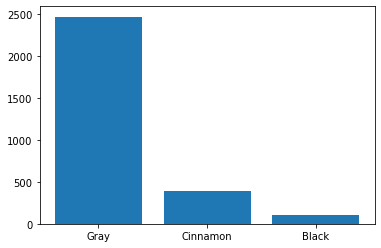

In [5]:
x = ["Gray", "Cinnamon", "Black"]
y = [len(gray), len(cinn), len(black)]

plt.bar(x, y)

Since **so many squirrels are gray**, it would be hard to find a correlation between color and disposition using only primary fur color. So, let's make a new split, this time taking into account highlight fur color.

In [6]:
# reset lists
gray = []
cinn = []
black = []

for s in colors:
    if s[0] == "Gray" or s[0] == "Grey+":
        # s[1] => highlight color
        if s[1] == "Cinnamon":
            cinn.append(s)
        elif s[1] == 'Black':
            black.append(s)
        else:
            gray.append(s)
    elif s[0] == "Cinnamon":
        cinn.append(s)
    elif s[0] == "Black":
        black.append(s)
    else:
        continue
        # we dont need these squirrs

<BarContainer object of 3 artists>

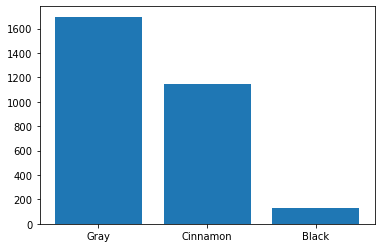

In [7]:
# Let's see how that changed our viz...

x = ["Gray", "Cinnamon", "Black"]
y = [len(gray), len(cinn), len(black)]

plt.bar(x, y)

Much better! It looks like a lot of squirrels had **'Cinnamon' as their highlight color**.

In [8]:
# lets refresh our memory on which cols we need for question 1:
need_cols 

['Primary Fur Color',
 'Highlight Fur Color',
 'Combination of Primary and Highlight Color',
 'Color notes',
 'Approaches',
 'Indifferent',
 'Runs from']

In [9]:
# We want each of the disposition variables to be bools. Let's see if that's already the case...
type(gray[0][4])

str

In [10]:
# Need to convert to bool!!!
bool('')
# And we can't just type cast ):

False

In [11]:
def makeBool(lst):
    
    ret = []
    for s in lst:
        new_s = []
        for i in range(4, 7):
            if s[i] == 'true':
                new_s.append(True)
            else:
                new_s.append(False)
                 # set rando values to false too
        ret.append(new_s)
    return ret      

Great! In the next section, we will analyze, for each color group, how many squirrels:
* approached humans (:
* ran away from them ):
* were indifferent /:

But for now, let's move on to Question #2: Is there a correlation between a squirrel's **location** in the park, and the **action** it was performing when spotted?

In [12]:
need_cols_2 = ["Running", "Chasing", "Climbing", "Eating", "Foraging", "X", "Y", "Lat/Long"]

# let's take a look at x, y and lat/long.. might need to convert to int
print(squirrels[0][index_of["X"]], squirrels[0][index_of["Y"]], squirrels[0][index_of["Lat/Long"]])

-73.9561344937861 40.7940823884086 POINT (-73.9561344937861 40.7940823884086)


It looks like "Lat/Long" is a tuple of the X and Y coordinates. Let's see what type they all are.

In [13]:
print(type(squirrels[0][index_of["Lat/Long"]]))
print(type(squirrels[0][index_of["X"]]))
print(type(squirrels[0][index_of["Y"]]))

<class 'str'>
<class 'str'>
<class 'str'>


If we want to do numerical calculations on location, we need the X and Y to be floats. We'll ignore the "Lat/Long" column for now since it doesn't provide any new information, and we'd have to parse out the 'POINT' in the beginning.

In [14]:
print(index_of["X"], index_of["Y"])

0 1


In [15]:
temp = squirrels[0][0]
print(temp)
temp.isnumeric()
# small problem...

-73.9561344937861


False

According to the docs, isnumeric() returns False because some characters in the string ('-' and '.') aren't numeric. This is a problem, since we need to retain the negative sign in order to keep their location accurate.

In [16]:
# The lat and long coordinates of Central Park are ~(-73, 40.7). We can (safely) assume all the lat long coords to be within a 1 degree margin
# of this, which means we can assume the 'integer' part to be 2 characters long

def coordinate_to_float(coord):
    if coord[0] == '-':
        is_neg = True
        whole_num = coord[1:3]
        decimals = coord[4:] # get rid of '.' in the middle
        # if its neg, then it's a x coord, and we can get rid of the preceding -73
        return -1 * (int(whole_num) + int(decimals) / (10 ** len(decimals))) + 73
    else:
        is_neg = False
        whole_num = coord[:2]
        decimals = coord[3:]
        # if its pos, then it's a y coord, and we can get rid of the preceding 40
        return int(whole_num) + int(decimals) / (10 ** len(decimals)) - 40


In [17]:
indices = []
for c in need_cols_2[:5]:
      indices.append(index_of[c])
indices

[15, 16, 17, 18, 19]

In [18]:
locations_actions = []
for s in squirrels:
    new_s = {}
    try:
        new_s['X'] = (coordinate_to_float(s[0]))
        new_s['Y'] = (coordinate_to_float(s[1]))
    except:
        continue
        # leave out squirrels with bad X or Y coords
    col_header = 0
    for i in indices:
        new_s[need_cols_2[col_header]] = s[i]
        col_header += 1
    locations_actions.append(new_s)

print(type(locations_actions[0]['X'])) # float!
locations_actions[:2]

<class 'float'>


[{'X': -0.9561344937860952,
  'Y': 0.7940823884085972,
  'Running': 'false',
  'Chasing': 'false',
  'Climbing': 'false',
  'Eating': 'false',
  'Foraging': 'false'},
 {'X': -0.9688574691102048,
  'Y': 0.7837825208443974,
  'Running': 'false',
  'Chasing': 'false',
  'Climbing': 'false',
  'Eating': 'false',
  'Foraging': 'false'}]

Now that our data is parsed for both questions, we can move onto Part 4.

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [19]:
# Mean lat/long coords

x_coords = []
y_coords = []

for s in locations_actions:
    x_coords.append(s['X'])
    y_coords.append(s['Y'])

    
x_mean = np.mean(x_coords)
y_mean = np.mean(y_coords)
x_med = np.median(x_coords)
y_med = np.median(y_coords)  

print('Mean: ', x_mean, y_mean)
print('Median: ', x_med, y_med)
# not much difference, but a little goes a long way with lat/long in a small area

Mean:  -0.9671838463915962 0.7808530064521801
Median:  -0.9685940262068016 0.7781658424866009


#### Dispersion

In [20]:
x_max = max(x_coords)
y_max = max(y_coords)
x_min = min(x_coords)
y_min = min(y_coords)

print('(max, min) of X, Y: ', (x_max, x_min), (y_max, y_min)),


print('Range of X, Y: ',  x_max - x_min, y_max - y_min)
# case in point ^

print('Standard Dev of X, Y: ', np.std(x_coords), np.std(y_coords))

(max, min) of X, Y:  (-0.9497217674555003, -0.9811585807616012) (0.8001185184891995, 0.7649106677137993)
Range of X, Y:  0.03143681330610093 0.03520785077540012
Standard Dev of X, Y:  0.007725027890778171 0.010283550101471068


#### Outliers


In [21]:
# Outlier are typically considered to be anything > 2.5 standard deviations from the mean

outlier_cutoff_x = np.std(x_coords) * 2.5
outlier_cutoff_y = np.std(y_coords) * 2.5
print('Cutoffs for X, Y: ', outlier_cutoff_x, outlier_cutoff_y)

outliers = []
locations_actions_copy = []

for s in locations_actions:
    if s['X'] - x_mean  > outlier_cutoff_x or s['Y'] - y_mean > outlier_cutoff_y:
        outliers.append(s)
    else:
        locations_actions_copy.append(s)

print(len(outliers), len(locations_actions_copy))
# no outliers!

Cutoffs for X, Y:  0.019312569726945426 0.02570887525367767
0 3023


#### Other


In [22]:
# Let's see if there's a correlation between location and action!
# Split the park into 4 sections: NW, NE, SW, SE
NW = []
SW = []
NE = []
SE = []

for s in locations_actions:
    if s['X'] < x_med:
        if s['Y'] < y_med:
            SW.append(s)
        else:
            NW.append(s)
    else:
        if s['Y'] < y_med:
            SE.append(s)
        else:
            NE.append(s)

print(len(NW) - len(NE))
print(len(SW) - len(SE))

# most squirrels are either in NE or SW

-1132
1131


In [23]:
running = {'NW': 0, 'NE': 0, 'SW': 0, 'SE': 0}
chasing = {'NW': 0, 'NE': 0, 'SW': 0, 'SE': 0}
climbing = {'NW': 0, 'NE': 0, 'SW': 0, 'SE': 0}
eating = {'NW': 0, 'NE': 0, 'SW': 0, 'SE': 0}
foraging = {'NW': 0, 'NE': 0, 'SW': 0, 'SE': 0}

# could convert to bool, but decided not tooo

def update_count(region):
    
    for s in locations_actions:
        if s['Running'] == 'true':
            running[region] += 1
        if s['Chasing'] == 'true':
            chasing[region] += 1
        if s['Climbing'] == 'true':
            climbing[region] += 1
        if s['Eating'] == 'true':
            eating[region] += 1
        if s['Foraging'] == 'true':
            foraging[region] += 1

update_count('NW')
update_count('SW')
update_count('NE')
update_count('NE')

###  Analysis on Categorical Data

#### Frequency

In [24]:
# here, we double-count squirrels that did multiple actions (if there are any)
shy = {'gray': 0, 'cinn': 0, 'black': 0}
friendly = {'gray': 0, 'cinn': 0, 'black': 0}
indiff = {'gray': 0, 'cinn': 0, 'black': 0}

for s in makeBool(gray): 
    if s[0]:
        friendly['gray'] += 1
    if s[1]:
        indiff['gray'] += 1
    if s[2]:
        shy['gray'] += 1
        
for s in makeBool(cinn): 
    if s[0]:
        friendly['cinn'] += 1
    if s[1]:
        indiff['cinn'] += 1
    if s[2]:
        shy['cinn'] += 1
        
for s in makeBool(black): 
    if s[0]:
        friendly['black'] += 1
    if s[1]:
        indiff['black'] += 1
    if s[2]:
        shy['black'] += 1
        
print('Shy: ', shy)
print('friendly: ', friendly)
print('too cool for school: ', indiff)

# looks like most were indifferent

Shy:  {'gray': 364, 'cinn': 271, 'black': 35}
friendly:  {'gray': 76, 'cinn': 94, 'black': 6}
too cool for school:  {'gray': 840, 'cinn': 546, 'black': 58}


#### Unique Values

In [25]:
# This analysis was done earlier, but the concise version is as follows:

unique_colors = []
for s in squirrels:
    if s[index_of["Primary Fur Color"]] in unique_colors:
        continue
    else:
        unique_colors.append(s[index_of["Primary Fur Color"]])

unique_colors

['', 'Gray', 'Cinnamon', 'Black']

## Part 5 - Visualizations



Question 1: Correlating a squirrel's fur color with its disposition towards humans.

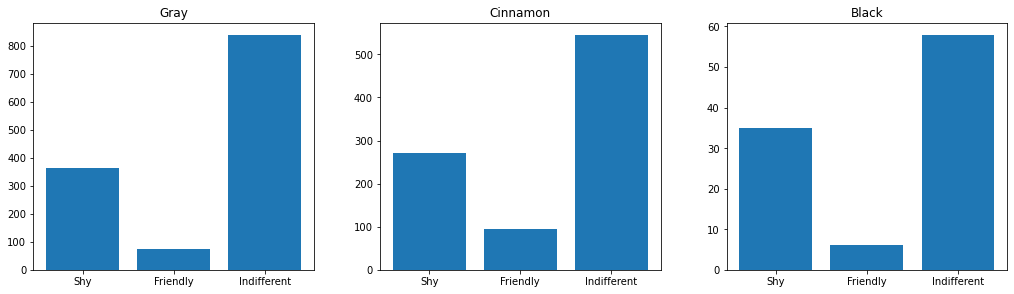

In [26]:
x = ['Shy', 'Friendly', 'Indifferent']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# gray
plt.subplot(1, 3, 1)
plt.title('Gray')
y = [shy['gray'], friendly['gray'], indiff['gray']]
plt.bar(x, y)

# cinn
plt.subplot(1, 3, 2)
plt.title('Cinnamon')
y = [shy['cinn'], friendly['cinn'], indiff['cinn']]
plt.bar(x, y)

# black
plt.subplot(1, 3, 3)
plt.title('Black')
y = [shy['black'], friendly['black'], indiff['black']]
plt.bar(x, y)


fig.tight_layout(pad=4)
plt.show()

Each of these bar charts displays the number of squirrels of a given color that shy, friendly, or indifferent. Not that these graphs display quantitiy in absolute terms as opposed to proportion. While the normalzation of the image size implies a sort of proportional analysis, it would be better to calculate the proportion of squirrel of each color that are shy, etc., and then display those instead.

**Question 2**: Correlating a squirrel's location with its action(s).

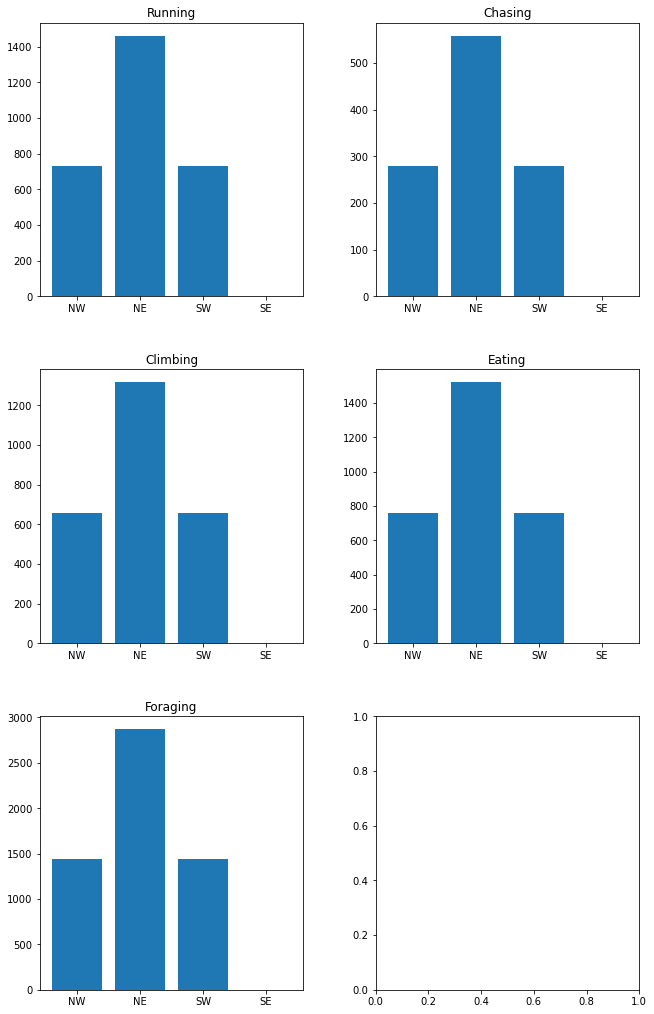

In [27]:
x = ['NW', 'NE', 'SW', 'SE']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))


# Running
plt.subplot(3, 2, 1)
plt.title('Running')
y = [running['NW'], running['NE'], running['SW'], running['SE']]
plt.bar(x, y)


# Chasing
plt.subplot(3, 2, 2)
plt.title('Chasing')
y = [chasing['NW'], chasing['NE'], chasing['SW'], chasing['SE']]
plt.bar(x, y)

# Climbing
plt.subplot(3, 2, 3)
plt.title('Climbing')
y = [climbing['NW'], climbing['NE'], climbing['SW'], climbing['SE']]
plt.bar(x, y)

# Eating
plt.subplot(3, 2, 4)
plt.title('Eating')
y = [eating['NW'], eating['NE'], eating['SW'], eating['SE']]
plt.bar(x, y)

# Foraging
plt.subplot(3, 2, 5)
plt.title('Foraging')
y = [foraging['NW'], foraging['NE'], foraging['SW'], foraging['SE']]
plt.bar(x, y)


fig.tight_layout(pad=4)
plt.show()

Each of the above graphs diaplays, for a given action, the number of squirrels in each region of Central Park that were spotted performing that action. Note that for all actions, the number of squirrels is significantly higher for the Northeast (NE) region, and I suspect that is because of the sheer quanitity of squirrels found in that region. A possible explanation is discussed below.

## Part 6 - Conclusion

**Question 1**

Proportionally, there doesn't seem to much a discernable correlation between a squirrel's color and its disposiiton. That is, a grey squirrel is equally likely to be shy (or friendly, or indifferent) as a cinnamon or black squirrel. There is no scientific evidence to suggest that the oppposite is true, and truthfully, a conclusion supporting this conjecture would probably be due to some error in the data or some transformation we performed.


**Question 2**

Proportionally, there doesn't seem to much a discernable correlation between a squirrel's location and the action it was seen performing. Unlike above, it's entirely plausible that certain areas of the park are more condusive to certain activities. For instance, one can imagine that more food is available in one region, so more squirrels are seen eating, or there's heavier foot traffic in another region, so more squirrels are seen running or climbing. However, our analysis does not support this conjecture.

Additionally, it's important to note the disparity in squirrels numbers throughout the four regions. The vast majorty were spotted in the NE region, and virtually **none** were spotted in the SE regions. Perhaps splitting the regions up by using the median x and y coordinates was not ideal for this particular application.

## Part 7 - Heights and Weights

In [28]:
adults_raw = []
with open(root + "/data/raw/adult19.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        adults_raw.append(row)
        
headers = adults_raw[0]
# looks like missing vals are just empty strings

In [29]:
indices = []

for i in range(len(headers)):
    if headers[i] == 'HEIGHTTC_A' or headers[i] == 'WEIGHTLBTC_A':
        indices.append(i)
        
indices

[49, 50]

In [72]:
adults = []
heights = []
weights = []
for a in adults_raw[1:]:
    if a[49] == '' or a[50] == '':
        continue
    else:
        adults.append([int(a[49]), int(a[50])])
        heights.append(int(a[49]))
        weights.append(int(a[50]))

In [73]:
np.corrcoef(heights, weights)

array([[1.        , 0.76046219],
       [0.76046219, 1.        ]])

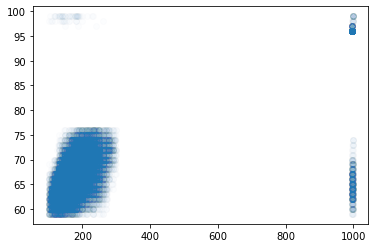

In [74]:
plt.scatter(heights, weights, alpha=0.01)
plt.show()

# gotta git rid of those outliers...

In [81]:
for h, w in zip(heights, weights):
    if h > 700:
        heights.remove(h)
        weights.remove(w)

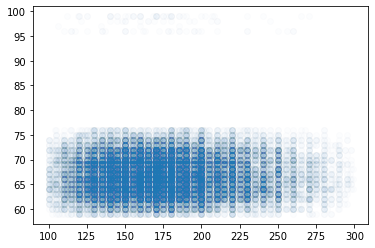

In [82]:
plt.scatter(heights, weights, alpha=0.01)
plt.show()